In [19]:
import numpy as np
import matplotlib.pyplot as plt
import xmitgcm  # see 
import xarray as xr  # see http://xarray.pydata.org/en/stable/plotting.html
%matplotlib notebook

In [52]:
datad = '../runs/RunFr1300/'
ds = xmitgcm.open_mdsdataset(datad,prefix={'PH','T','U','W'},endian='<',iters=[900,7800])
# make new x in km for plotting
ds=ds.assign_coords(XC0 = ds.XC/1000.-ds.XC.mean()/1000.)
ds=ds.assign_coords(XG0 = (ds.XG-ds.XC.mean())/1000.)
TRef=ds['T'][0,:,0,0]


In [65]:
print(T)

[[26.896326530612246 26.896324222559333 26.896322555370787 ...,
  26.896325925486444 26.896326165739357 26.896326530612246]
 [25.79265306122449 25.792649250830543 25.79264645627023 ...,
  25.792663497646117 25.792659125634433 25.79265306122449]
 [24.688979591836734 24.688975943350354 24.688973267356964 ...,
  24.688986205241754 24.68898343577801 24.688979591836734]
 ..., 
 [2.615510204081648 2.6155097984070275 2.6155095008119233 ...,
  2.6155109393114806 2.615510631467038 2.615510204081648]
 [1.511836734693894 1.51183641015351 1.5118361720717135 ...,
  1.5118371758296714 1.511836991127622 1.511836734693894]
 [0.4081632653061398 0.40816362768655307 0.4081638677162204 ...,
  0.4081640167875562 0.4081637156674425 0.4081632653061398]]


<IPython.core.display.Javascript object>


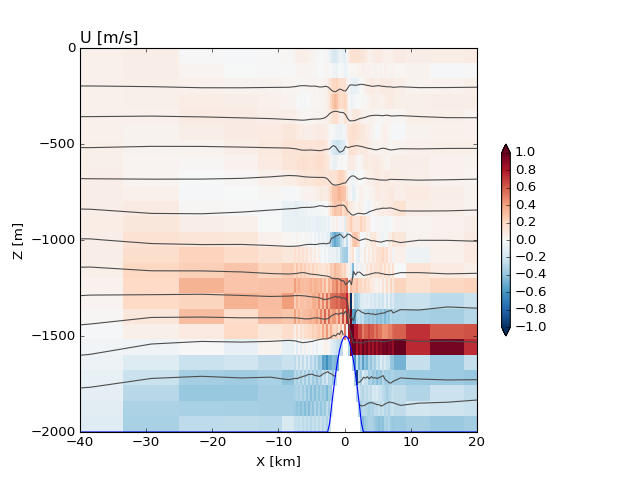

In [64]:


fig,ax = plt.subplots()
T0 = ds['T'][0,:,:,:]
T= ds['U'][-1,:,0,:]
T = np.ma.masked_where(T0[:,0,:]==0,T)
pcm=ax.pcolormesh(ds['XG0'][0,:], ds['Zp1'],T-0.32,vmin=-1,vmax=1,cmap='RdBu_r',rasterized=True) # -2:2
T= ds['T'][-1,:,0,:]
T = np.ma.masked_where(T0[:,0,:]==0,T)
ax.contour(ds['XC0'][0,:], ds['Z'],T,np.sort(TRef[::2]),colors='0.3',)
ax.plot(ds['XC0'][0,:],-ds['Depth'][0,:])
ax.set_xlim([-40.,20.])
fig.colorbar(pcm, ax=ax,shrink=0.5,extend='both')
ax.set_xlabel('X [km]')
ax.set_ylabel('Z [m]')
ax.set_title('U [m/s]',loc='left')
if 1:
    fig.savefig('../docs/images/Snapshot.png')